In [19]:
from sklearn.datasets import make_regression
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [3]:
X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20, coef=True, random_state=0)
coef

array(42.38550486)

In [10]:
dfX0 = pd.DataFrame(X0, columns=["X1"])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["y"])

model = sm.OLS(dfy, dfX)
result = model.fit()

In [11]:
result.params

const    -1.628364
X1       42.853356
dtype: float64

In [15]:
N = 1000
params_c = np.zeros(N)
params_x1 = np.zeros(N)

for i in range(N):
    idx = np.random.choice(len(dfy), len(dfy), replace=True)
    dfX2 = dfX.iloc[idx, :]
    dfy2 = dfy.iloc[idx]
    r = sm.OLS(dfy2, dfX2).fit()
    params_c[i] = r.params.const
    params_x1[i] = r.params.X1
    

In [17]:
params_x1


array([42.74507128, 43.97898239, 41.90758675, 46.91285038, 40.02245546,
       43.72455277, 45.30970835, 42.66207382, 44.11247155, 44.62047242,
       40.84515371, 39.52437877, 45.81460424, 43.31848988, 41.62358192,
       46.32743713, 40.90570241, 41.60066389, 41.73790822, 42.58749125,
       40.77330312, 42.65705481, 42.78982631, 46.26649717, 43.71348047,
       40.68145663, 44.32034316, 45.85017094, 40.16232128, 41.18969725,
       44.49290704, 44.37494905, 43.32611065, 45.97860753, 41.60315485,
       43.23978121, 43.44511136, 43.56703091, 40.48590818, 42.96791801,
       45.89280808, 39.15666538, 41.63278638, 40.90740821, 44.8281375 ,
       43.51968283, 42.59515343, 43.98845718, 42.79641811, 42.32486816,
       40.05039511, 45.18858868, 42.15236738, 44.60092157, 42.76294313,
       42.98379128, 43.77846436, 41.31834276, 45.12657557, 40.75481052,
       45.86537642, 42.42022421, 43.49357758, 39.29612376, 42.76809988,
       42.64693509, 42.49772366, 44.06121386, 43.12747393, 42.29

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


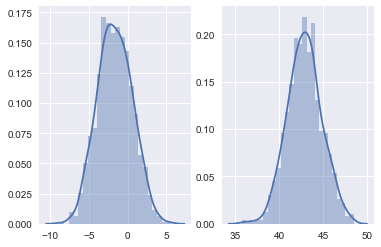

In [21]:
ax1 = plt.subplot(121)
sns.distplot(params_c, ax=ax1)

ax2 = plt.subplot(122)
sns.distplot(params_x1, ax=ax2)
plt.show()

In [22]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Mon, 25 Jun 2018   Prob (F-statistic):           2.21e-36
Time:                        19:39:36   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.453      -5.920       2.663
X1            42.8534      2.142     20.008      0.000      38.603      47.104
==============================================================================
Omnibus:                        3.523   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                2.059
Skew:                          -0.073   Prob(JB):                        0.357
Kurtosis:                       2.312   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""